# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [83]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment
import random

In [84]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [85]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [178]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.9, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.Q={}
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        
        

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring  
     
    def getQ(self, state, action):
        return self.Q.get((state, action), 0.0)
    
    def epsilon_greedy(self,state):
        
        q=[self.getQ(state,a) for a in self.actions]
        
        #print("q type"+str(type(q)))
        cardinality=len(q)
        #print("cardinality "+str(cardinality))
        #print(cardinality)
        probs_policy=np.ones(cardinality,dtype=float)*self.epsilon/cardinality
        best_a=q.index(max(q))
        if q.count(best_a)>1:
            best = [i for i in range(len(self.actions)) if q[i] == best_a]
            best_a = random.choice(best)
            
        #print(best_a)
        probs_policy[best_a]+=(1.0 - self.epsilon)
       
        return (probs_policy)
        
        
    
    def act(self, state):
        
        stateStr = self.stateToString(state)      
            #print(stateStr)
        p = self.epsilon_greedy(stateStr)
        #print(p)
        possible_a = self.actions
        
        i=np.random.choice(np.arange(len(possible_a)), p=p)
        
        ## TODO 2
        ## Implement epsilon greedy policy here
        action = self.actions[i]
            
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        oldv = self.Q.get((state1Str, action1), None)
        if oldv is None:
            self.Q[(state1Str, action1)] = reward 
        else:
            best_a= max([self.getQ(state2Str, a) for a in self.actions])
            #print(best_a)
            temp=self.alpha*(reward+self.gamma*(best_a-oldv))
            self.Q[(state1Str, action1)]+=temp
        ## TODO 3
        ## Implement the q-learning update her
        
        return self.Q
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


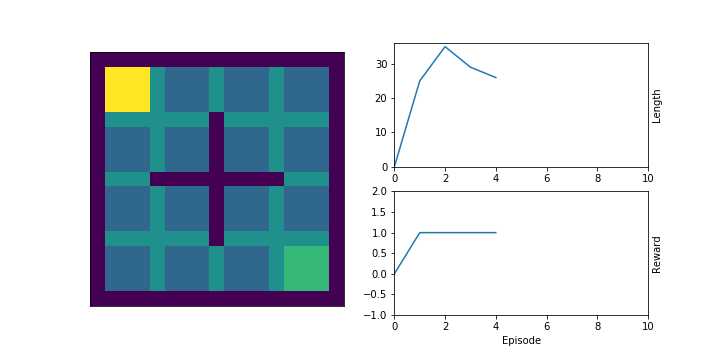

KeyboardInterrupt: 

In [172]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

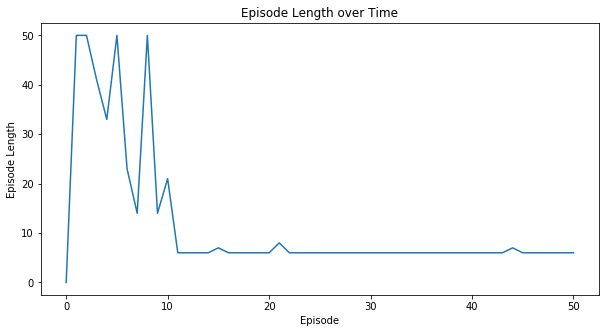

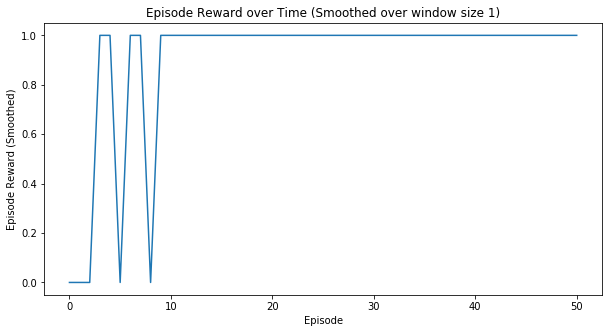

In [179]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

<IPython.core.display.Javascript object>


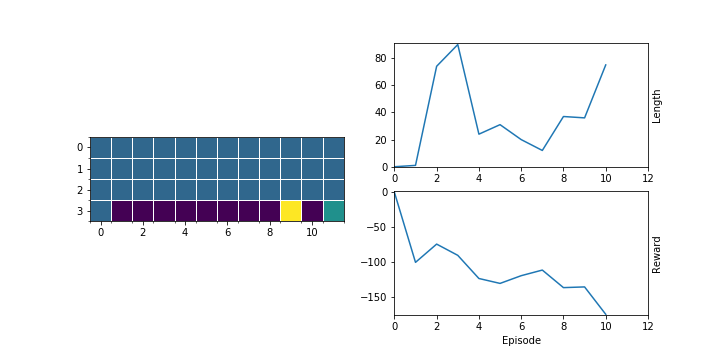

3.00.0
cardinality 4
[0.925 0.025 0.025 0.025]
3.00.0
cardinality 4
[0.925 0.025 0.025 0.025]
2.00.0
cardinality 4
[0.925 0.025 0.025 0.025]
1.01.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.01.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.01.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.02.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.01.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.01.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.00.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.00.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.00.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.01.0
cardinality 4
[0.025 0.025 0.025 0.925]
0.00.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.00.0
cardinality 4
[0.025 0.025 0.925 0.025]
2.00.0
cardinality 4
[0.025 0.925 0.025 0.025]
2.01.0
cardinality 4
[0.925 0.025 0.025 0.025]
1.01.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.02.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.03.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.03.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.04.0
cardin

2.01.0
cardinality 4
[0.925 0.025 0.025 0.025]
1.01.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.01.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.01.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.02.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.02.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.02.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.03.0
cardinality 4
[0.025 0.025 0.925 0.025]
2.03.0
cardinality 4
[0.925 0.025 0.025 0.025]
1.03.0
cardinality 4
[0.025 0.025 0.025 0.925]
0.03.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.04.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.03.0
cardinality 4
[0.025 0.025 0.025 0.925]
1.01.0
cardinality 4
[0.025 0.025 0.925 0.025]
2.01.0
cardinality 4
[0.025 0.925 0.025 0.025]
2.02.0
cardinality 4
[0.025 0.925 0.025 0.025]
2.03.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.03.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.04.0
cardinality 4
[0.025 0.025 0.925 0.025]
2.04.0
cardinality 4
[0.025 0.925 0.025 0.025]
2.05.0
cardinality 4
[0.025 0.925 0.025 0.025]
2.06.0
cardin

0.08.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.08.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.09.0
cardinality 4
[0.025 0.025 0.925 0.025]
0.09.0
cardinality 4
[0.925 0.025 0.025 0.025]
0.09.0
cardinality 4
[0.025 0.925 0.025 0.025]
0.010.0
cardinality 4
[0.025 0.025 0.025 0.925]
0.09.0
cardinality 4
[0.025 0.025 0.925 0.025]
1.09.0
cardinality 4
[0.025 0.925 0.025 0.025]
1.09.0
cardinality 4
[0.025 0.025 0.925 0.025]
2.09.0
cardinality 4
[0.025 0.025 0.925 0.025]


In [102]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.0, 0.0, 0.0, 0.0]
q type<class 'list'>
cardinality 4
[0.0, 0.0, 0.0, 0.0]
q type<class 'list'>

[-1.0, -1.0, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.0, -1.0, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.0, -1.0, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.4, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.4, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.4, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.4, -1.2, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.2]
q type<class 'l

[-1.4, -1.4, -1.4, -1.44]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.4, -1.4, -1.44]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.4, -1.2]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.56, -1.4, -1.44]
q type<class 'list'>
cardinality 4
[-1.4, -1.528, -1.3599999999999999, -1.472]
q type<class 'list'>
cardinality 4
[-1.408, -1.3599999999999999, -100.0, -1.5328128]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -100.0, -1.2544]
q type<class 'list'>
cardinality 4
[-1.4, -1.3599999999999999, -1.3599999999999999, -1.24]
q type<class 'list'>
cardinality 4
[-1.4, -1.528, -1.5599999999999998, -1.472]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.56, -1.5919999999999999, -1.44]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.728, -1.5999999999999999, -1.672]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.728, -1.5999999999999999, -1.672]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.6944, -1.6256, -1.7621

cardinality 4
[-1.408, -1.488, -100.0, -1.51328]
q type<class 'list'>
cardinality 4
[-1.4, -1.488, -1.528, -1.464]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.56, -1.48]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.4, -1.56, -1.48]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.272]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.4, -1.2]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.56, -1.56, -1.48]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.688, -1.82944, -1.712]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.56, -1.56, -1.7216]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.4, -1.456]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.4, -1.4, -1.456]
q type<class 'list'>
cardinality 4
[-1.4, -1.4, -1.2, -1.2]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.2, -1.0]
q type<class 'list'>
cardinality 4
[-1.4, -1.2, -1.2, -1.272]
q 

[-1.0, -1.0, -100.0, 0.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.0, -100.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.0, -1.0, -100.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.0, -100.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.0, -1.0, -100.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.0, -100.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.0, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-1.2, -1.2, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-3.218083420540502, -100.0, -3.2000000000000006, -3.2000000000000006]
q type<class 'list'>
cardinality 4
[-3.218083420540502, -100.0, -3.400000000000001, -3.2000000000000006]
q type<class 'list'>
cardinality 4
[-3.218083420540502, -100.0, -3.400000000000001, -3.400000000000001]
q type<class 'list'>
cardinality 4
[-2.832974516224, -2.7071088394240004, -2.94817792, -2.8000000000000003]
q

[-1.82912, -1.8611199999999999, -100.0, -1.7797888]
q type<class 'list'>
cardinality 4
[-2.052980736, -2.10424576, -100.0, -2.0202624]
q type<class 'list'>
cardinality 4
[-2.20056643584, -2.2779008, -100.0, -2.26127872]
q type<class 'list'>
cardinality 4
[-2.2068915199999997, -2.1652608, -2.3247682559999996, -2.18630926336]
q type<class 'list'>
cardinality 4
[-2.051968, -1.966656, -2.10969088, -2.166303744]
q type<class 'list'>
cardinality 4
[-1.80896, -1.88672, -1.80032, -1.968]
q type<class 'list'>
cardinality 4
[-1.82912, -1.8611199999999999, -100.0, -2.02788352]
q type<class 'list'>
cardinality 4
[-1.80896, -1.88672, -2.00608, -1.968]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.8816, -1.963584, -1.90144]
q type<class 'list'>
cardinality 4
[-1.9999999999999998, -1.8816, -1.963584, -1.90144]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.7376, -1.7168, -1.88448]
q type<class 'list'>
cardinality 4
[-1.7919999999999998, -1.8358400000000001, -1.72452864, -1.

cardinality 4
[-2.6, -2.690345472, -2.6245168709631996, -2.5745536]
q type<class 'list'>
cardinality 4
[-2.8000000000000003, -2.8643736576, -2.8405661019340798, -2.77703725056]
q type<class 'list'>
cardinality 4
[-3.0000000000000004, -2.965287936, -2.8887892582399997, -3.0000000000000004]
q type<class 'list'>
cardinality 4
[-3.0268435456, -2.99176921923584, -2.87336387313664, -3.0000000000000004]
q type<class 'list'>
cardinality 4
[-3.11995147124736, -3.2356341479112705, -3.262503181352602, -3.2000000000000006]
q type<class 'list'>
cardinality 4
[-3.0268435456, -2.99176921923584, -3.122681392758784, -3.0000000000000004]
q type<class 'list'>
cardinality 4
[-2.9446641664, -2.8295024164863998, -2.9303763874611204, -2.9146717478912]
q type<class 'list'>
cardinality 4
[-2.5901056, -2.6392449253375996, -2.571458101248, -2.7056425721856]
q type<class 'list'>
cardinality 4
[-2.602015346688, -2.6051782655999998, -100.0, -2.82073792823296]
q type<class 'list'>
cardinality 4
[-2.5901056, -2.63924

[-3.459988295227802, -3.540327186706989, -3.570002545082082, -3.600000000000001]
q type<class 'list'>
cardinality 4
[-3.2145324236799997, -3.159315858685952, -3.377328947430949, -3.2000000000000006]
q type<class 'list'>
cardinality 4
[-3.12860606464, -2.9778935534387196, -3.123307006427136, -3.13173739831296]
q type<class 'list'>
cardinality 4
[-2.7920844799999998, -2.7924985834700795, -2.986203225915392, -2.94744840732672]
q type<class 'list'>
cardinality 4
[-2.8000000000000003, -2.8520174592000003, -2.82746248183808, -2.8150503301120002]
q type<class 'list'>
cardinality 4
[-3.0000000000000004, -2.8520174592000003, -2.82746248183808, -2.8150503301120002]
q type<class 'list'>
cardinality 4
[-3.12860606464, -3.1407317387509757, -3.123307006427136, -3.13173739831296]
q type<class 'list'>
cardinality 4
[-3.220122896269312, -3.1895740706324482, -100.0, -3.3743674152452097]
q type<class 'list'>
cardinality 4
[-2.99522062794752, -2.9297945536102397, -100.0, -3.064387858333696]
q type<class '

[-2.8399595134976003, -2.8901555372032, -100.0, -2.755577003114496]
q type<class 'list'>
cardinality 4
[-3.0344609793441792, -3.0843408478175234, -100.0, -2.9988095149998077]
q type<class 'list'>
cardinality 4
[-3.154676219052032, -3.2169856818937856, -100.0, -3.3190339201125583]
q type<class 'list'>
cardinality 4
[-2.9936675839999998, -3.1281592249024506, -3.2018401523990527, -3.183679938789376]
q type<class 'list'>
cardinality 4
[-3.0000000000000004, -3.01640843264, -3.051459666935808, -3.0519177945088]
q type<class 'list'>
cardinality 4
[-3.2000000000000006, -3.01640843264, -3.051459666935808, -3.0519177945088]
q type<class 'list'>
cardinality 4
[-3.0000000000000004, -2.982391386112, -3.047083273289728, -2.8918170275676163]
q type<class 'list'>
cardinality 4
[-3.2000000000000006, -3.191490151625523, -3.051459666935808, -3.0519177945088]
q type<class 'list'>
cardinality 4
[-3.1949340671999997, -3.1281592249024506, -3.2018401523990527, -3.183679938789376]
q type<class 'list'>
cardinal

[-2.6142921924608, -2.5312177815552, -100.0, -2.475304906752]
q type<class 'list'>
cardinality 4
[-2.8228488986624, -2.8599652325785603, -100.0, -2.7339068506112003]
q type<class 'list'>
cardinality 4
[-3.04040627519488, -3.0533504925696002, -100.0, -3.0042235054915585]
q type<class 'list'>
cardinality 4
[-3.2240932676737435, -3.235464580953539, -100.0, -3.2299828558102526]
q type<class 'list'>
cardinality 4
[-3.2079362103705598, -3.14097307648, -3.304970037999698, -3.1864869476656743]
q type<class 'list'>
cardinality 4
[-3.055676448977715, -2.94738403229696, -3.1064582108912027, -3.068536132416307]
q type<class 'list'>
cardinality 4
[-2.797837312, -2.6889204318208, -2.8334170744422402, -2.907902730816717]
q type<class 'list'>
cardinality 4
[-2.5838960639999997, -2.6288150462464, -2.481202167808, -2.6680720965632]
q type<class 'list'>
cardinality 4
[-2.6142921924608, -2.5312177815552, -100.0, -2.7270252955238403]
q type<class 'list'>
cardinality 4
[-2.4409646194688, -2.309111283712, -1

cardinality 4
[-1.6079999999999999, -1.7264, -1.7711999999999999, -1.7382399999999998]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.8355199999999998, -1.728, -1.91584]
q type<class 'list'>
cardinality 4
[-1.8319999999999999, -1.7264, -1.7711999999999999, -1.7382399999999998]
q type<class 'list'>
cardinality 4
[-1.472, -1.5999999999999999, -1.488, -1.6736]
q type<class 'list'>
cardinality 4
[-1.5999999999999999, -1.5999999999999999, -1.7024, -1.664]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.5999999999999999, -1.7024, -1.664]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.7999999999999998, -1.7024, -1.664]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.8355199999999998, -1.92768, -1.91584]
q type<class 'list'>
cardinality 4
[-1.9999999999999998, -1.8355199999999998, -1.92768, -1.91584]
q type<class 'list'>
cardinality 4
[-1.7999999999999998, -1.7999999999999998, -1.7024, -1.8912]
q type<class 'list'>
cardinality 4
[-1.6976, -1.59

cardinality 4
[-2.1999999999999997, -2.159104, -2.163904, -2.40072524644352]
q type<class 'list'>
cardinality 4
[-1.9999999999999998, -2.008896, -1.92768, -1.91584]
q type<class 'list'>
cardinality 4
[-2.1999999999999997, -2.3104512, -2.163904, -2.40072524644352]
q type<class 'list'>
cardinality 4
[-2.23427731161088, -2.1530751999999995, -2.29067776, -2.20937901817856]
q type<class 'list'>
cardinality 4
[-1.8319999999999999, -1.8755199999999999, -1.9514239999999998, -2.0090367999999996]
q type<class 'list'>
cardinality 4
[-1.9999999999999998, -2.008896, -1.92768, -2.1654528]
q type<class 'list'>
cardinality 4
[-2.051136, -1.8755199999999999, -1.9514239999999998, -2.0090367999999996]
q type<class 'list'>
cardinality 4
[-1.6976, -1.5999999999999999, -1.5904, -1.6736]
q type<class 'list'>
cardinality 4
[-1.2, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-4.898961448459442, -100.0, -4.985631522755603, -4.800000000000002]
q type<class 'list'>
cardinality 4
[-4.898961

[-4.493535809652786, -4.378697594254474, -100.0, -4.446299606825564]
q type<class 'list'>
cardinality 4
[-4.102682241843094, -4.176695483444136, -100.0, -4.353790627317263]
q type<class 'list'>
cardinality 4
[-4.145157331209378, -4.0782403357639145, -4.228079086230026, -4.125990533676433]
q type<class 'list'>
cardinality 4
[-3.9978633821278127, -3.8802760194270642, -3.90357370478758, -3.914726328122378]
q type<class 'list'>
cardinality 4
[-3.395783699035587, -3.3051312520974827, -3.4526884579141015, -3.4040513571952524]
q type<class 'list'>
cardinality 4
[-2.98969348096, -3.106592069976064, -3.0803199746899965, -3.1717765034900194]
q type<class 'list'>
cardinality 4
[-3.2000000000000006, -3.185471182831616, -3.0936998370541566, -3.0774732992806917]
q type<class 'list'>
cardinality 4
[-3.400000000000001, -3.4209960144477884, -3.3830534333058253, -3.3432683362573616]
q type<class 'list'>
cardinality 4
[-3.600000000000001, -3.6263814060444224, -3.7024281680223194, -3.6779192787845356]
q t

[-4.800000000000002, -4.706409553310019, -4.8466641582136525, -4.800000000000002]
q type<class 'list'>
cardinality 4
[-4.600000000000001, -4.528031304516119, -4.554548131780393, -4.737880636871575]
q type<class 'list'>
cardinality 4
[-4.400000000000001, -4.287679517327325, -4.230453627791452, -4.444307074105827]
q type<class 'list'>
cardinality 4
[-4.342073799301385, -4.390490654422798, -4.453221394447473, -4.38464737896071]
q type<class 'list'>
cardinality 4
[-4.400000000000001, -4.287679517327325, -4.452777662093439, -4.444307074105827]
q type<class 'list'>
cardinality 4
[-4.200000000000001, -4.0760367535716355, -4.253955194131283, -4.077261094542309]
q type<class 'list'>
cardinality 4
[-3.800000000000001, -3.777715811496703, -3.9012426652224828, -3.9131996474266155]
q type<class 'list'>
cardinality 4
[-3.600000000000001, -3.555536778969062, -3.5855994864517777, -3.5946146690058893]
q type<class 'list'>
cardinality 4
[-3.400000000000001, -3.323184162832384, -3.4854023817996533, -3.33

[-5.757911642497667, -100.0, -5.785631522755604, -5.8000000000000025]
q type<class 'list'>
cardinality 4
[-5.188876540994347, -5.2729977767179665, -5.35595368374263, -5.177379356481433]
q type<class 'list'>
cardinality 4
[-5.188876540994347, -5.2729977767179665, -5.35595368374263, -5.377379356481433]
q type<class 'list'>
cardinality 4
[-4.993668089833262, -4.983583772129437, -4.859070004481231, -4.971313851308233]
q type<class 'list'>
cardinality 4
[-5.322915233691724, -5.2729977767179665, -5.35595368374263, -5.377379356481433]
q type<class 'list'>
cardinality 4
[-4.823363254868474, -4.918256791881458, -100.0, -4.975492043821296]
q type<class 'list'>
cardinality 4
[-4.810577151340972, -4.784345659344405, -4.842921913407473, -4.812249333399975]
q type<class 'list'>
cardinality 4
[-4.531194942906573, -4.547871899487021, -4.681809910800143, -4.634279785283529]
q type<class 'list'>
cardinality 4
[-4.600000000000001, -4.59628077166095, -4.452777662093439, -4.66635528564074]
q type<class 'li

[-5.000000000000002, -4.9934655485161805, -4.972898079486232, -4.95030450949726]
q type<class 'list'>
cardinality 4
[-5.000000000000002, -5.047665547042175, -5.071594096832569, -5.000000000000002]
q type<class 'list'>
cardinality 4
[-5.200000000000002, -5.047665547042175, -5.071594096832569, -5.000000000000002]
q type<class 'list'>
cardinality 4
[-5.200000000000002, -5.047665547042175, -5.071594096832569, -5.200000000000002]
q type<class 'list'>
cardinality 4
[-5.000000000000002, -4.9934655485161805, -4.972898079486232, -5.160243607597809]
q type<class 'list'>
cardinality 4
[-5.186891180657126, -5.083334395005499, -5.05798888910227, -5.048533084686632]
q type<class 'list'>
cardinality 4
[-5.1690812525768575, -5.318661077196254, -5.384675183891389, -5.171313851308233]
q type<class 'list'>
cardinality 4
[-5.200000000000002, -5.232712053530987, -5.071594096832569, -5.200000000000002]
q type<class 'list'>
cardinality 4
[-5.349583821427999, -5.318661077196254, -5.384675183891389, -5.1713138

[-4.795110688394715, -4.763142520719504, -4.921705745493391, -4.938093515761922]
q type<class 'list'>
cardinality 4
[-4.444017660273235, -4.526456413342503, -4.495042456337945, -4.563333198561557]
q type<class 'list'>
cardinality 4
[-4.600000000000001, -4.518512505284901, -4.4929663178668795, -4.658813118820961]
q type<class 'list'>
cardinality 4
[-4.653807391791964, -4.526456413342503, -4.495042456337945, -4.563333198561557]
q type<class 'list'>
cardinality 4
[-4.610590913661871, -4.510811097643834, -100.0, -4.557131160348471]
q type<class 'list'>
cardinality 4
[-4.031573330940552, -4.130490669190085, -100.0, -4.2958738890941905]
q type<class 'list'>
cardinality 4
[-4.195912601227133, -4.13227086368905, -4.059257252733378, -4.204054693812406]
q type<class 'list'>
cardinality 4
[-4.237110115299117, -4.130490669190085, -100.0, -4.2958738890941905]
q type<class 'list'>
cardinality 4
[-3.8418303243512746, -3.8599159834777526, -100.0, -3.7535133449658926]
q type<class 'list'>
cardinality 4

cardinality 4
[-4.596660650703043, -4.480381411610272, -4.469822189688824, -4.73602427104082]
q type<class 'list'>
cardinality 4
[-4.612149127948673, -4.532794311326046, -100.0, -4.586928233927629]
q type<class 'list'>
cardinality 4
[-4.0613042818989165, -4.120040206239589, -100.0, -4.323414612221451]
q type<class 'list'>
cardinality 4
[-4.19128469614922, -4.183508406412109, -4.072662474428978, -4.238260269019026]
q type<class 'list'>
cardinality 4
[-4.263575920404929, -4.120040206239589, -100.0, -4.323414612221451]
q type<class 'list'>
cardinality 4
[-3.834491085876403, -3.802559872958382, -3.895917055544687, -3.7755615807456677]
q type<class 'list'>
cardinality 4
[-4.19128469614922, -4.183508406412109, -4.2821380207911, -4.238260269019026]
q type<class 'list'>
cardinality 4
[-3.834491085876403, -3.802559872958382, -3.895917055544687, -4.057150945878956]
q type<class 'list'>
cardinality 4
[-3.4776128084330415, -3.342956894023527, -3.399038769904292, -3.548501099269391]
q type<class 'l

cardinality 4
[-3.2000000000000006, -3.0794425417728, -3.1036213514760354, -3.265282536049682]
q type<class 'list'>
cardinality 4
[-2.9645184, -2.73187504128, -2.622592, -2.699464210115461]
q type<class 'list'>
cardinality 4
[-2.5152272384, -2.4708161331199996, -2.5022631120142336, -2.5992285953151466]
q type<class 'list'>
cardinality 4
[-1.95808, -1.9999999999999998, -1.91410065408, -1.9491072]
q type<class 'list'>
cardinality 4
[-1.2, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-7.053593976148438, -100.0, -6.985631522755605, -7.0000000000000036]
q type<class 'list'>
cardinality 4
[-7.053593976148438, -100.0, -7.185631522755605, -7.0000000000000036]
q type<class 'list'>
cardinality 4
[-7.053593976148438, -100.0, -7.185631522755605, -7.200000000000004]
q type<class 'list'>
cardinality 4
[-6.509386355545107, -6.427421904402911, -6.599313483575155, -6.577379356481434]
q type<class 'list'>
cardinality 4
[-6.058077398395126, -5.986573176507383, -100.0, -6.110090999

[-2.14583615488, -1.9819856014905182, -100.0, -2.0767134526996482]
q type<class 'list'>
cardinality 4
[-1.2, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-7.362208487250283, -100.0, -7.385631522755605, -7.400000000000004]
q type<class 'list'>
cardinality 4
[-6.757759274256378, -6.761802307568547, -6.916577091411245, -6.777379356481434]
q type<class 'list'>
cardinality 4
[-6.5016490179429, -6.385220102934858, -6.457547531747671, -6.371313851308234]
q type<class 'list'>
cardinality 4
[-6.5016490179429, -6.385220102934858, -6.457547531747671, -6.5713138513082345]
q type<class 'list'>
cardinality 4
[-6.258793376067718, -6.216955766144264, -6.183941368506387, -6.298412821611166]
q type<class 'list'>
cardinality 4
[-6.401875066882601, -6.24527593799846, -100.0, -6.40354867053208]
q type<class 'list'>
cardinality 4
[-5.8607570559301285, -5.880826763177406, -100.0, -5.993250281405401]
q type<class 'list'>
cardinality 4
[-5.869766769896843, -5.98479471439512, -5.89248835

q type<class 'list'>
cardinality 4
[-4.400000000000001, -4.314387865921251, -4.235838422430618, -4.206134348730697]
q type<class 'list'>
cardinality 4
[-4.800000000000002, -4.722908453596504, -4.860703624686553, -4.9258073862925835]
q type<class 'list'>
cardinality 4
[-4.400000000000001, -4.314387865921251, -4.235838422430618, -4.509489169703858]
q type<class 'list'>
cardinality 4
[-4.236005089726367, -4.2443458030064996, -4.284035821140904, -4.347708825774331]
q type<class 'list'>
cardinality 4
[-4.400000000000001, -4.314387865921251, -4.435871755889767, -4.509489169703858]
q type<class 'list'>
cardinality 4
[-4.000000000000001, -3.833801402152865, -3.9532495727359955, -4.083480308634023]
q type<class 'list'>
cardinality 4
[-3.400000000000001, -3.290350788757684, -3.443628209893766, -3.5562114020004043]
q type<class 'list'>
cardinality 4
[-2.9645184, -2.865400315904, -2.792236826624, -2.999571368092369]
q type<class 'list'>
cardinality 4
[-2.758556798976, -2.559473037312, -2.598928185

cardinality 4
[-8.013897559083947, -100.0, -8.185631522755605, -8.000000000000004]
q type<class 'list'>
cardinality 4
[-8.013897559083947, -100.0, -8.185631522755605, -8.200000000000003]
q type<class 'list'>
cardinality 4
[-7.345242615825062, -7.3863644803132305, -7.588295040684468, -7.377379356481435]
q type<class 'list'>
cardinality 4
[-7.132683573537542, -6.9936689206927705, -7.012686988651826, -6.971313851308235]
q type<class 'list'>
cardinality 4
[-7.132683573537542, -6.9936689206927705, -7.012686988651826, -7.171313851308235]
q type<class 'list'>
cardinality 4
[-6.775689502881913, -6.633453479922764, -6.852392398089728, -6.807105198617904]
q type<class 'list'>
cardinality 4
[-6.464729663842765, -6.361676684438214, -6.301590345971428, -6.4342992970000745]
q type<class 'list'>
cardinality 4
[-6.446317753044295, -6.508626768787429, -100.0, -6.584099915669127]
q type<class 'list'>
cardinality 4
[-6.464729663842765, -6.361676684438214, -6.530535827386002, -6.4342992970000745]
q type<c

cardinality 4
[-6.191950810624713, -6.280478254326283, -6.275076018831527, -6.435743930789611]
q type<class 'list'>
cardinality 4
[-6.391950810624714, -6.280478254326283, -6.275076018831527, -6.435743930789611]
q type<class 'list'>
cardinality 4
[-6.391666105030519, -6.292004467416121, -6.364392624842543, -6.294251152452723]
q type<class 'list'>
cardinality 4
[-5.992224219069615, -5.939867082344672, -5.8536268891719905, -5.914848195259794]
q type<class 'list'>
cardinality 4
[-5.597711650072061, -5.519814614056122, -5.47238595962861, -5.560964973221998]
q type<class 'list'>
cardinality 4
[-5.430013149712887, -5.3455571478397195, -100.0, -5.440305738404422]
q type<class 'list'>
cardinality 4
[-4.874486573200195, -4.889983766326781, -100.0, -4.895149101918857]
q type<class 'list'>
cardinality 4
[-5.021591688801237, -4.945097922306617, -4.8789673506965165, -5.320156314299539]
q type<class 'list'>
cardinality 4
[-5.075382728699459, -4.889983766326781, -100.0, -4.895149101918857]
q type<clas

cardinality 4
[-7.200000000000004, -7.12652536767035, -7.130180380389647, -7.239679089378085]
q type<class 'list'>
cardinality 4
[-6.78110808777694, -6.803333550303231, -6.699790577208399, -6.954191372688529]
q type<class 'list'>
cardinality 4
[-6.834625896459068, -6.73427837589712, -6.750306569773417, -6.987446498705791]
q type<class 'list'>
cardinality 4
[-6.391666105030519, -6.404328951767295, -6.364392624842543, -6.294251152452723]
q type<class 'list'>
cardinality 4
[-6.834625896459068, -6.846272931208241, -6.750306569773417, -6.987446498705791]
q type<class 'list'>
cardinality 4
[-7.003049056237404, -6.835312317009903, -100.0, -6.884589623137212]
q type<class 'list'>
cardinality 4
[-6.359587634092458, -6.415614824707915, -100.0, -6.440867510571012]
q type<class 'list'>
cardinality 4
[-6.391666105030519, -6.404328951767295, -6.364392624842543, -6.585462235916862]
q type<class 'list'>
cardinality 4
[-6.560548632242475, -6.415614824707915, -100.0, -6.440867510571012]
q type<class 'li

cardinality 4
[-6.196474380843514, -6.24883578416262, -6.273702226363029, -6.233165116300994]
q type<class 'list'>
cardinality 4
[-6.200000000000003, -6.123311605211679, -6.27577169408519, -6.291933010354434]
q type<class 'list'>
cardinality 4
[-5.762657914301951, -5.68578348225477, -5.795537304890355, -5.705692671445561]
q type<class 'list'>
cardinality 4
[-5.200000000000002, -5.228416304702521, -5.2432603827079705, -5.213177491894457]
q type<class 'list'>
cardinality 4
[-5.400000000000002, -5.228416304702521, -5.2432603827079705, -5.213177491894457]
q type<class 'list'>
cardinality 4
[-5.762657914301951, -5.7886267858038165, -5.795537304890355, -5.705692671445561]
q type<class 'list'>
cardinality 4
[-6.200000000000003, -6.235805980620297, -6.27577169408519, -6.291933010354434]
q type<class 'list'>
cardinality 4
[-6.400000000000003, -6.235805980620297, -6.27577169408519, -6.291933010354434]
q type<class 'list'>
cardinality 4
[-5.762657914301951, -5.7886267858038165, -5.795537304890355

[-4.400000000000001, -4.276781475767555, -4.31766760922822, -4.394258746269231]
q type<class 'list'>
cardinality 4
[-3.800000000000001, -3.665061192175631, -3.781583502293538, -3.8742721198639387]
q type<class 'list'>
cardinality 4
[-3.1645184000000004, -3.07902764941312, -3.0763929740723093, -3.3196570944738957]
q type<class 'list'>
cardinality 4
[-2.758556798976, -2.7552695427517646, -2.7921723249841204, -2.923865071358393]
q type<class 'list'>
cardinality 4
[-2.285724357787648, -1.9999999999999998, -1.9774820018631476, -2.279071397169974]
q type<class 'list'>
cardinality 4
[-1.5490048837222399, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-9.152464280408042, -100.0, -9.1757387690232, -9.2]
q type<class 'list'>
cardinality 4
[-8.48735038755272, -8.491948350880298, -8.592110074799086, -8.577379356481433]
q type<class 'list'>
cardinality 4
[-8.042065070484274, -8.066131160949958, -8.1804890259717, -7.971313851308236]
q type<class 'list'>
cardinality 4
[-8.042065

cardinality 4
[-8.68054069643305, -8.740666718836753, -8.940560700119704, -8.777379356481433]
q type<class 'list'>
cardinality 4
[-8.322437440426853, -8.216530695678125, -8.462813235737176, -8.371313851308235]
q type<class 'list'>
cardinality 4
[-7.8506721170338745, -7.877256941159862, -8.052725636621252, -8.089460840854963]
q type<class 'list'>
cardinality 4
[-7.800000000000004, -7.765716477900725, -7.8005286738473325, -7.737394617201976]
q type<class 'list'>
cardinality 4
[-8.000000000000004, -7.961350106558705, -8.179625128833699, -8.000000000000004]
q type<class 'list'>
cardinality 4
[-7.800000000000004, -7.765716477900725, -7.8005286738473325, -7.982185715073322]
q type<class 'list'>
cardinality 4
[-7.381108087776941, -7.394133128096136, -7.512394894475815, -7.506796247778257]
q type<class 'list'>
cardinality 4
[-7.581108087776941, -7.394133128096136, -7.512394894475815, -7.506796247778257]
q type<class 'list'>
cardinality 4
[-6.991950810624714, -7.048923939321937, -7.070119397395

cardinality 4
[-7.359318277883582, -7.199694720777025, -100.0, -7.3851101191903625]
q type<class 'list'>
cardinality 4
[-6.830544389406057, -6.68424138541668, -100.0, -6.64821000063001]
q type<class 'list'>
cardinality 4
[-7.359318277883582, -7.289397776747622, -100.0, -7.3851101191903625]
q type<class 'list'>
cardinality 4
[-6.830544389406057, -6.68424138541668, -100.0, -6.976447555853532]
q type<class 'list'>
cardinality 4
[-6.242100942552531, -6.09430907827267, -100.0, -6.3470564016727025]
q type<class 'list'>
cardinality 4
[-5.4895980812704055, -5.498637243209564, -100.0, -5.529281745998058]
q type<class 'list'>
cardinality 4
[-5.646278650846866, -5.55634518422793, -5.650034713612849, -5.62602539269244]
q type<class 'list'>
cardinality 4
[-5.096761179240192, -4.97413146728742, -5.013421100830892, -5.010019581563678]
q type<class 'list'>
cardinality 4
[-4.36388536116721, -4.314662202169568, -4.270358114059628, -4.502478467859693]
q type<class 'list'>
cardinality 4
[-4.11153146338047

cardinality 4
[-3.098324713178304, -2.9958026811106215, -100.0, -3.0570204161099475]
q type<class 'list'>
cardinality 4
[-2.4766113308188085, -1.9998670772004215, -100.0, -2.0767134526996482]
q type<class 'list'>
cardinality 4
[-1.5490048837222399, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-9.88108442226148, -100.0, -9.975738769023197, -9.999999999999996]
q type<class 'list'>
cardinality 4
[-9.185503476931332, -9.135486176407703, -9.296550382724067, -9.177379356481431]
q type<class 'list'>
cardinality 4
[-8.530074123800963, -8.598239659746357, -100.0, -8.613826417782908]
q type<class 'list'>
cardinality 4
[-8.378255214796896, -8.344285719669223, -8.539598000873529, -8.364131319831406]
q type<class 'list'>
cardinality 4
[-7.946171049531225, -7.93267209947999, -7.8346803532299925, -8.120868163924175]
q type<class 'list'>
cardinality 4
[-8.08812842696494, -7.9340054659046695, -100.0, -8.132818094552384]
q type<class 'list'>
cardinality 4
[-7.534920008361272, -7.

q type<class 'list'>
cardinality 4
[-6.562657914301952, -6.55520496799291, -6.595218917289453, -6.658224782391495]
q type<class 'list'>
cardinality 4
[-6.000000000000003, -5.863223420457785, -6.018613611428958, -6.184125503300479]
q type<class 'list'>
cardinality 4
[-5.200000000000002, -5.212288530221803, -5.375530053842565, -5.435780116121652]
q type<class 'list'>
cardinality 4
[-5.400000000000002, -5.212288530221803, -5.375530053842565, -5.435780116121652]
q type<class 'list'>
cardinality 4
[-4.600000000000001, -4.649233425186878, -4.657368215396675, -4.7484791295708355]
q type<class 'list'>
cardinality 4
[-4.800000000000002, -4.649233425186878, -4.657368215396675, -4.7484791295708355]
q type<class 'list'>
cardinality 4
[-4.000000000000001, -3.9908840930197793, -4.068804021749392, -4.216291510055058]
q type<class 'list'>
cardinality 4
[-3.3645184000000006, -3.377507303836761, -3.3281690952433847, -3.640910602637334]
q type<class 'list'>
cardinality 4
[-3.0397491191808, -2.86766518471

[-7.776950833464538, -7.807228340190142, -7.790381910410812, -8.06070092901181]
q type<class 'list'>
cardinality 4
[-7.791950810624715, -7.7158645951599665, -7.71311071053814, -7.893125152122141]
q type<class 'list'>
cardinality 4
[-7.964182808879258, -7.807228340190142, -7.790381910410812, -8.06070092901181]
q type<class 'list'>
cardinality 4
[-7.899754531605213, -7.787902007605798, -100.0, -8.021218336162626]
q type<class 'list'>
cardinality 4
[-7.218752930204951, -7.222865224405058, -100.0, -7.28814204635508]
q type<class 'list'>
cardinality 4
[-7.169263579654352, -7.217345309700781, -7.319333063437122, -7.445881357189159]
q type<class 'list'>
cardinality 4
[-7.200000000000004, -7.152551157186547, -7.279117288478569, -7.171014355050764]
q type<class 'list'>
cardinality 4
[-6.562657914301952, -6.616808658485884, -6.595218917289453, -6.658224782391495]
q type<class 'list'>
cardinality 4
[-6.762657914301952, -6.616808658485884, -6.595218917289453, -6.658224782391495]
q type<class 'list

q type<class 'list'>
cardinality 4
[-4.111531463380476, -3.993263938563384, -100.0, -4.302627873516554]
q type<class 'list'>
cardinality 4
[-3.098324713178304, -2.999517203242895, -100.0, -3.0570204161099475]
q type<class 'list'>
cardinality 4
[-2.4766113308188085, -1.9999885820184584, -100.0, -2.0767134526996482]
q type<class 'list'>
cardinality 4
[-1.5490048837222399, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-10.67197976453386, -100.0, -10.775738769023194, -10.799999999999994]
q type<class 'list'>
cardinality 4
[-9.932972485602685, -9.89897374595743, -9.997805488816132, -9.977379356481428]
q type<class 'list'>
cardinality 4
[-9.284455659097294, -9.253955559714818, -100.0, -9.290725017891521]
q type<class 'list'>
cardinality 4
[-8.611163847085333, -8.607055799161884, -100.0, -8.804615742817068]
q type<class 'list'>
cardinality 4
[-8.081249293322198, -7.943830798581514, -100.0, -8.021218336162626]
q type<class 'list'>
cardinality 4
[-7.408855060094831, -7.35

cardinality 4
[-1.5490048837222399, -1.3599999999999999, -1.0, -1.0]
q type<class 'list'>
cardinality 4
[-10.903517192472085, -100.0, -10.975738769023193, -10.999999999999993]
q type<class 'list'>
cardinality 4
[-10.106325453765512, -10.1518756464186, -10.350343860207985, -10.177379356481428]
q type<class 'list'>
cardinality 4
[-9.592679455755215, -9.581086933160055, -9.69174923139178, -9.571313851308231]
q type<class 'list'>
cardinality 4
[-9.592679455755215, -9.581086933160055, -9.69174923139178, -9.77131385130823]
q type<class 'list'>
cardinality 4
[-9.208298795418436, -9.077376130007696, -9.275962651934789, -9.202005964971022]
q type<class 'list'>
cardinality 4
[-8.687715603081934, -8.614078695103949, -8.731853399559702, -8.704305817243075]
q type<class 'list'>
cardinality 4
[-8.164193440676229, -8.063304514456057, -7.989885929849809, -8.06070092901181]
q type<class 'list'>
cardinality 4
[-8.081249293322198, -8.146350345506633, -100.0, -8.365729130223935]
q type<class 'list'>
cardi

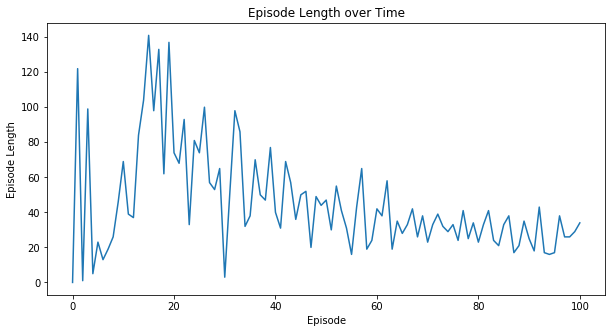

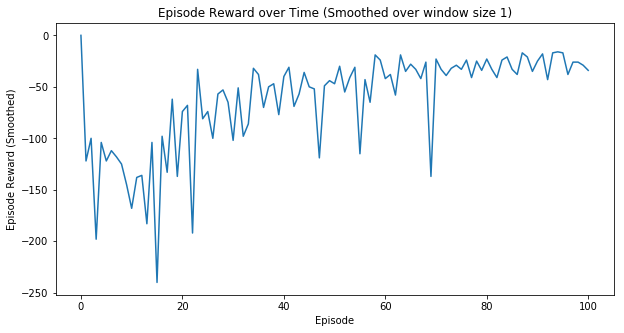

In [121]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(100, interactive)

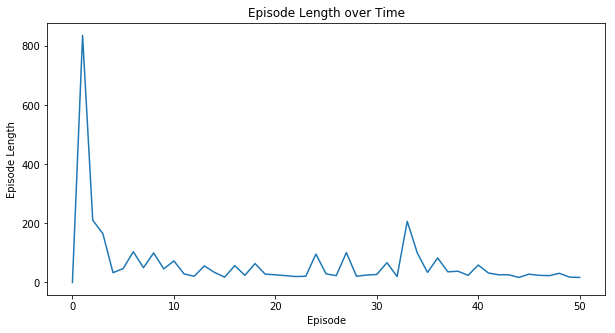

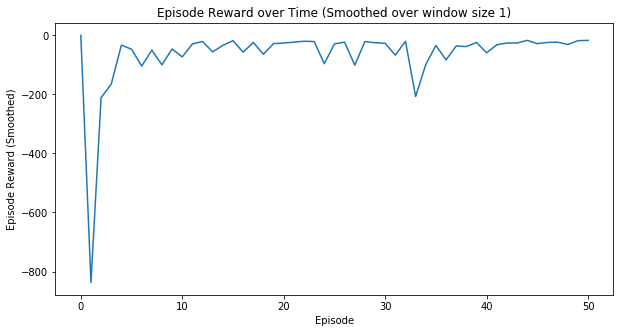

In [183]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)